In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/153mQSIQvgh0_XiKHu3E6eVAcfcRClZ21TiLwRtgRQ-g/edit#gid=0')
sheet = wb.sheet1

In [ ]:
data = sheet.get_all_values()

In [ ]:
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
df.head()

,status,gender,age,full,part,unemployed,self,student,travel_alone,with_family,with_friends,last_travel,covid_affect,plan_trip,prepare_doc,decide,plan_return,arrive_home,airport,plane,arrive_des,pack_list,research_des,google_review,video,ask,google_flights,hopper,kayyak,tripAdvisor,skyScanner,expedia,cheapoAir,agency,do_not_use,reason_affect_travel
1,1,1,2,1,0,0,0,0,0,1,1,2,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1
2,1,2,2,1,0,0,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
3,1,2,3,0,0,1,0,0,0,1,0,3,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,3
4,2,2,3,1,0,0,0,0,0,1,0,3,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,5
5,1,1,2,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,2


In [ ]:
df.describe

<bound method NDFrame.describe of 0  status gender age full  ... cheapoAir agency do_not_use reason_affect_travel
1       1      1   2    1  ...         0      0          0                    1
2       1      2   2    1  ...         0      0          0                    2
3       1      2   3    0  ...         0      0          0                    3
4       2      2   3    1  ...         0      0          0                    5
5       1      1   2    0  ...         0      0          0                    2
..    ...    ...  ..  ...  ...       ...    ...        ...                  ...
74      2      1   4    1  ...         1      0          0                    5
75      1      1   4    1  ...         0      0          0                    1
76      2      1   4    1  ...         0      1          0                    1
77      2      1   4    0  ...         0      0          0                    1
78      1      1   4    0  ...         0      0          0                    1

[78 r

In [ ]:
df.dtypes

0
status                  object
gender                  object
age                     object
full                    object
part                    object
unemployed              object
self                    object
student                 object
travel_alone            object
with_family             object
with_friends            object
last_travel             object
covid_affect            object
plan_trip               object
prepare_doc             object
decide                  object
plan_return             object
arrive_home             object
airport                 object
plane                   object
arrive_des              object
pack_list               object
research_des            object
google_review           object
video                   object
ask                     object
google_flights          object
hopper                  object
kayyak                  object
tripAdvisor             object
skyScanner              object
expedia                 object
cheapo

In [ ]:
df = df.apply(pd.to_numeric)
df.dtypes

0
status                  int64
gender                  int64
age                     int64
full                    int64
part                    int64
unemployed              int64
self                    int64
student                 int64
travel_alone            int64
with_family             int64
with_friends            int64
last_travel             int64
covid_affect            int64
plan_trip               int64
prepare_doc             int64
decide                  int64
plan_return             int64
arrive_home             int64
airport                 int64
plane                   int64
arrive_des              int64
pack_list               int64
research_des            int64
google_review           int64
video                   int64
ask                     int64
google_flights          int64
hopper                  int64
kayyak                  int64
tripAdvisor             int64
skyScanner              int64
expedia                 int64
cheapoAir               int64
agency  

In [ ]:
df.corr()

,status,gender,age,full,part,unemployed,self,student,travel_alone,with_family,with_friends,last_travel,covid_affect,plan_trip,prepare_doc,decide,plan_return,arrive_home,airport,plane,arrive_des,pack_list,research_des,google_review,video,ask,google_flights,hopper,kayyak,tripAdvisor,skyScanner,expedia,cheapoAir,agency,do_not_use,reason_affect_travel
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
status,1.000000,-0.008658,-0.339758,-0.369187,-7.029587e-02,0.060254,-7.029587e-02,0.396458,0.217361,-0.186064,-0.038633,-0.425006,-0.022275,-0.035452,0.381925,-0.028860,-1.179398e-01,-0.168829,0.020291,-0.253966,-0.029815,-0.066649,-0.087612,-2.879561e-02,-0.128333,-0.103895,-0.187916,-0.023036,4.617571e-02,0.069494,0.251104,-2.008453e-01,-0.135571,-0.049739,-0.041599,0.080193
gender,-0.008658,1.000000,-0.244628,-0.320299,3.359280e-01,0.108740,-4.271917e-02,0.227762,0.009435,0.062419,-0.149404,-0.060672,-0.093525,-0.145671,-0.006910,0.001116,1.962284e-01,0.153135,0.083375,0.262277,0.029466,0.103098,0.117174,3.340766e-02,0.186996,0.033036,-0.193199,-0.080178,-1.729911e-01,0.005202,0.006866,2.601986e-01,0.033010,-0.082186,0.116632,-0.008861
age,-0.339758,-0.244628,1.000000,0.600350,-2.660076e-02,-0.091440,2.975960e-01,-0.873749,-0.266217,0.234926,0.083147,0.459775,0.149088,-0.082904,-0.245523,-0.053512,-1.289592e-01,-0.207342,0.194840,0.058290,-0.001097,-0.094893,-0.055601,1.430178e-02,0.074741,0.115434,0.104334,-0.060067,9.555776e-02,0.112453,-0.034433,-2.660076e-02,0.038239,0.057641,0.070591,0.028896
full,-0.369187,-0.320299,0.600350,1.000000,-2.287899e-02,-0.150348,-1.503477e-01,-0.666054,-0.220172,0.129141,0.238904,0.272840,0.019678,-0.011539,-0.282046,0.063872,-4.999044e-02,-0.119887,0.264165,-0.009393,-0.079787,-0.078091,-0.152080,2.811608e-02,-0.032072,0.073641,0.258814,0.163073,1.371367e-01,0.041588,0.006604,-2.287899e-02,0.232058,0.060338,-0.057541,0.100233
part,-0.070296,0.335928,-0.026601,-0.022879,1.000000e+00,-0.054054,-5.405405e-02,0.058592,0.128339,-0.081449,-0.103975,0.135495,0.094205,-0.226608,-0.030055,-0.108740,2.583606e-02,-0.099136,-0.003413,0.194178,0.084700,-0.017937,-0.112984,-1.371271e-17,0.061676,-0.068351,0.061676,0.255745,4.271917e-02,-0.153848,0.129700,2.094595e-01,0.209459,-0.060847,-0.083967,-0.020857
unemployed,0.060254,0.108740,-0.091440,-0.150348,-5.405405e-02,1.000000,-5.405405e-02,-0.061676,0.011939,0.036199,-0.103975,0.074050,0.094205,-0.226608,-0.030055,-0.108740,-1.181077e-01,0.223057,0.129700,0.042719,-0.089158,0.098656,0.078598,1.162476e-01,0.181945,-0.068351,0.061676,-0.046499,1.941781e-01,-0.036199,-0.136526,-5.405405e-02,-0.054054,-0.060847,-0.083967,0.191341
self,-0.070296,-0.042719,0.297596,-0.150348,-5.405405e-02,-0.054054,1.000000e+00,-0.302213,-0.104462,0.153848,-0.103975,0.012604,0.094205,-0.110322,0.087160,0.042719,2.583606e-02,-0.099136,-0.136526,0.042719,-0.089158,-0.134531,-0.112984,-2.419890e-18,0.061676,0.173984,-0.058592,-0.046499,-1.087397e-01,0.081449,-0.003413,-5.405405e-02,-0.054054,-0.060847,0.097962,-0.162323
student,0.396458,0.227762,-0.873749,-0.666054,5.859232e-02,-0.061676,-3.022130e-01,1.000000,0.305813,-0.254019,-0.154227,-0.462365,-0.159278,0.059878,0.286691,-0.054947,1.280238e-01,0.107460,-0.155777,-0.054947,0.056969,0.032747,0.002242,-7.958372e-02,-0.066854,-0.133290,-0.231527,-0.122028,-1.240729e-01,-0.068151,0.026482,-6.167613e-02,-0.061676,-0.015274,-0.054291,-0.136787
travel_alone,0.217361,0.009435,-0.266217,-0.220172,1.283393e-01,0.011939,-1.044623e-01,0.305813,1.000000,-0.813504,-0.218160,-0.274204,0.016078,-0.155417,0.265523,-0.176693,-3.749810e-02,-0.049265,-0.087445,-0.109790,0.096489,0.003962,-0.186613,-7.702442e-02,-0.146436,-0.038427,-0.093311,-0.056485,1.578233e-01,-0.017989,0.030154,-2.208631e-01,0.011939,-0.143795,0.139090,-0.135994


Correlation between variables means that both independent variables have a relationship with each other.

Positively correlated (+1): the more X variable, the more Y variable
For example, the correlation between age and employed full-time is +0.6 means most people who are employed full-time are in 35+ age group

Negatively correlated (-1): the more X variable, the less Y variable
For example, the correlation between age and studen is -0.87 means most students are among lower age groups.

Normally, correlation < -0.7 or > +0.7 are considered significant.

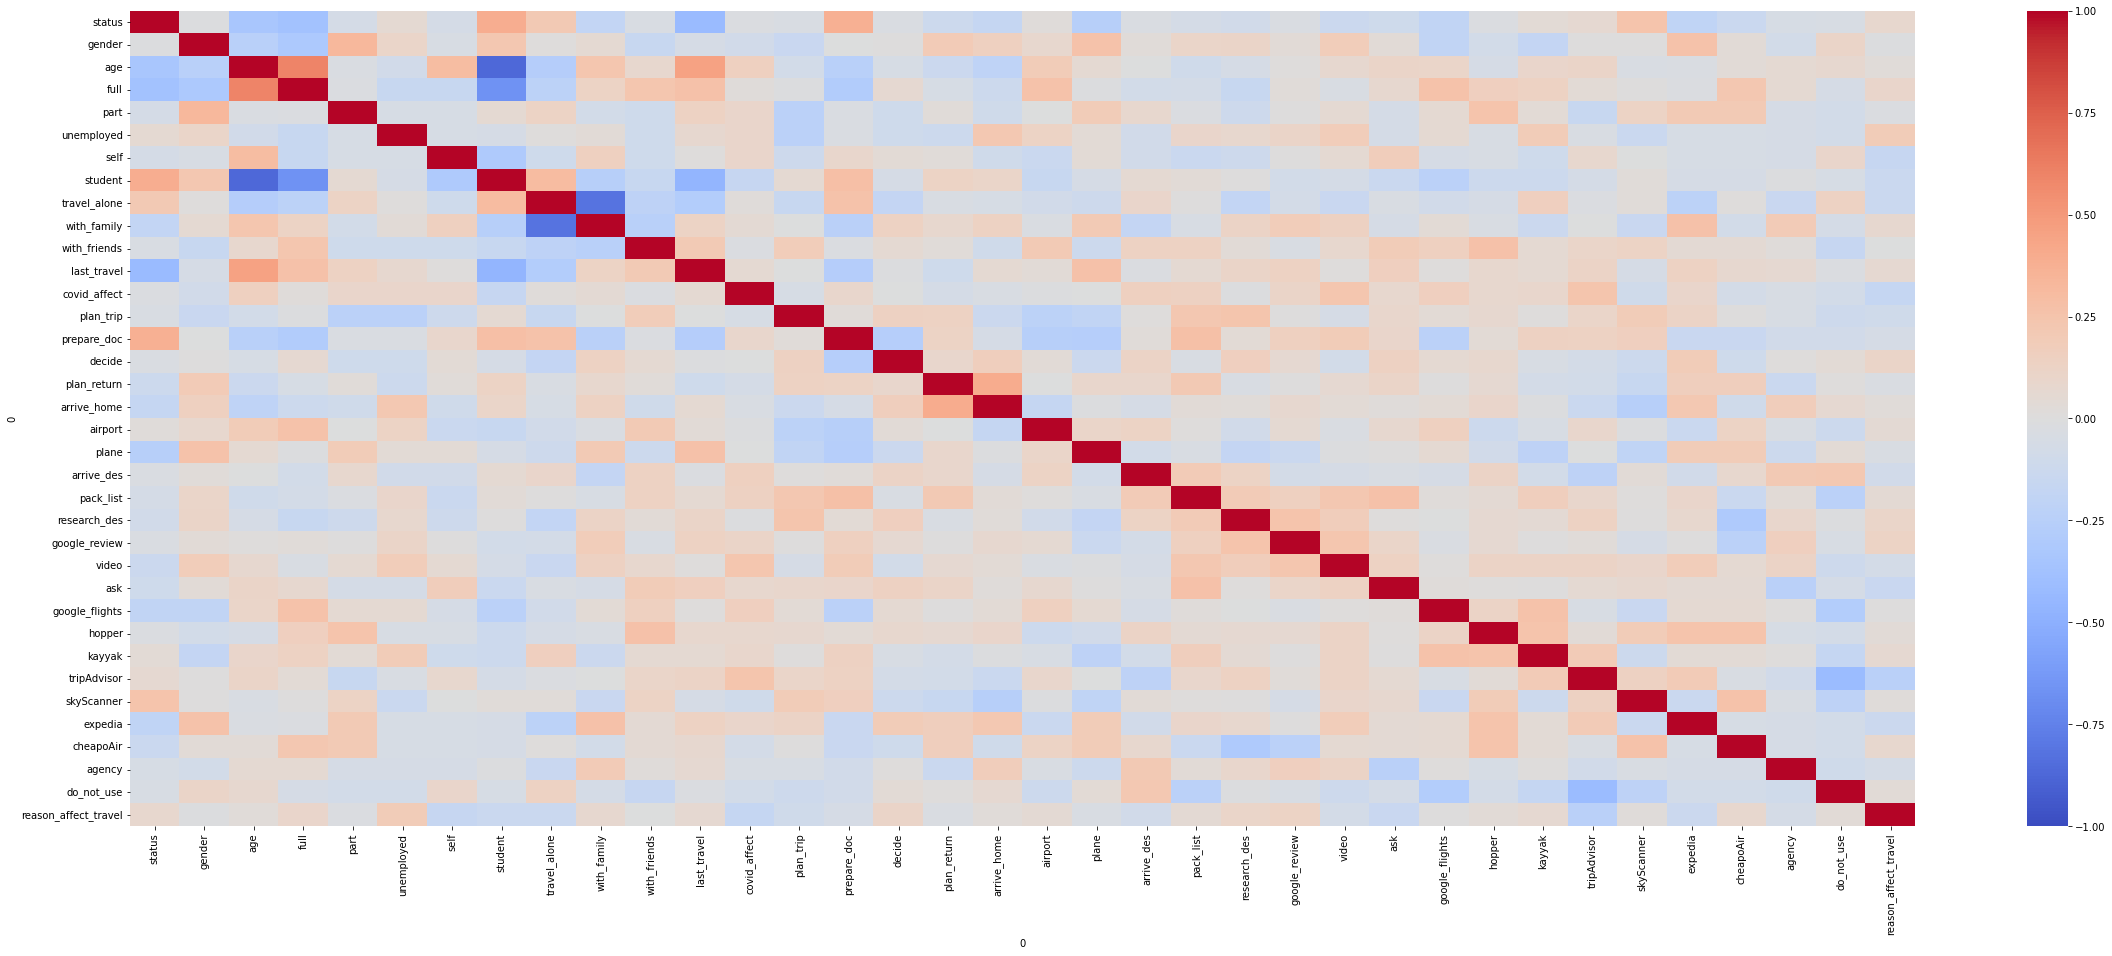

In [ ]:
plt.figure(figsize=(40, 15))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax= 1)
plt.show()

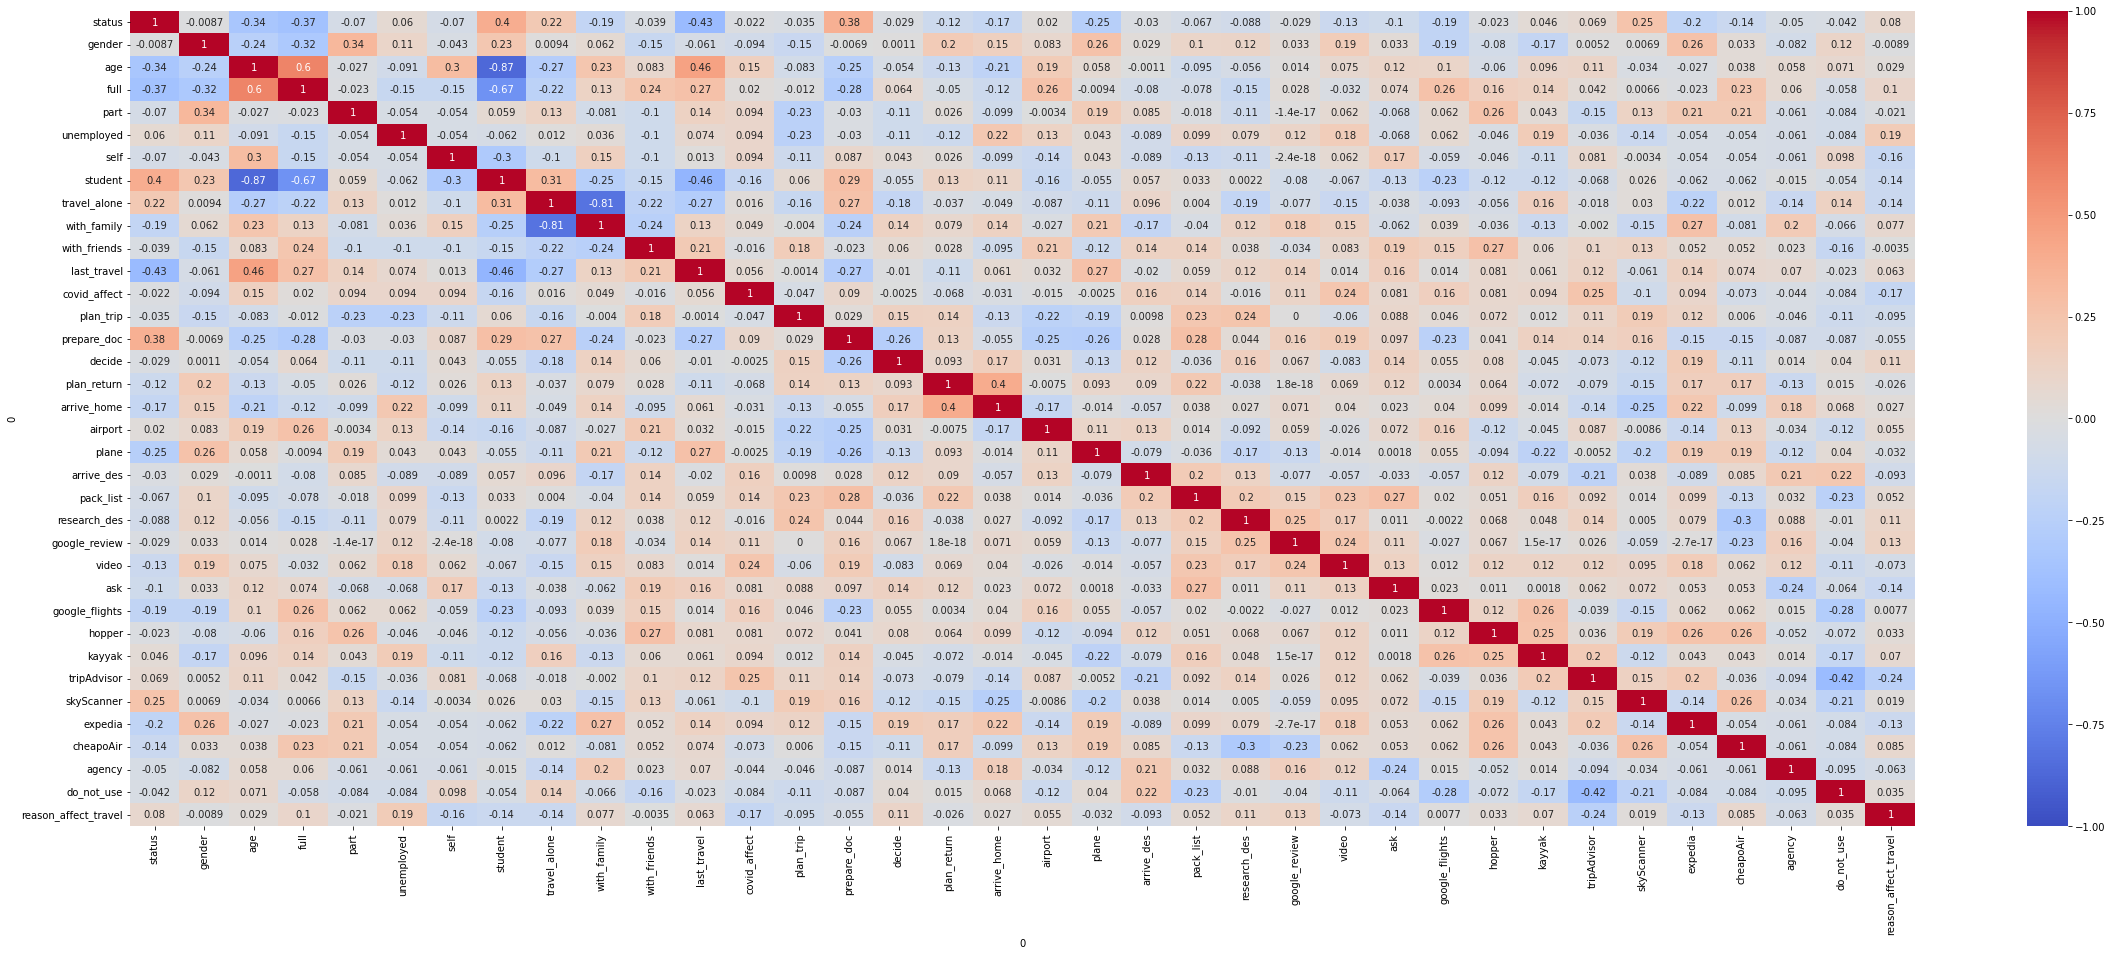

In [ ]:
plt.figure(figsize=(40, 15))
heatmap = sns.heatmap(df.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)